In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
data = pd.read_excel('data/Climate_change_links_2.xlsx')
data = data[
    ["VideoID", "Effectiveness2", "No of Views", "No of Comments", "No of Likes", "No of Dislikes", \
     "People","Mainstream Celebrity","Music","Animation","Past/Present/Future","Type"]]
data

,VideoID,Effectiveness2,No of Views,No of Comments,No of Likes,No of Dislikes,People,Mainstream Celebrity,Music,Animation,Past/Present/Future,Type
0,pvuN_WvF1to,1.0,301 M,"509, 621",10 M,"319, 000",Yes,Yes (Various),Yes (music video),Yes,Present,Comedy/Music Video
1,eRLJscAlk1M,3.0,26 M,162760,"2,2 M","40, 000",Yes (Prince Ea),No,Yes (Instrumental),No,Future,Serious/Emotional
2,VbiRNT_gWUQ,2.0,20 M,27002,78000,12000,No,No,Yes (Instrumental),Yes,Future,Serious
3,5dVcn8NjbwY,NaN,15 M,turned off,32000,9200,NaN,NaN,NaN,NaN,NaN,NaN
4,5scez5dqtAc,3.0,13 M,13780,177000,12000,Yes (talk show),No,No,No,Present,Comedy/Serious
...,...,...,...,...,...,...,...,...,...,...,...,...
185,TZ0j6kr4ZJ0,2.0,\n2.7M,7630,33000,3900,yes,no,no,no,present,documentary/effects
186,8DiWzvE52ZY,2.0,6.4M,5072,80000,1600,yes (music video),yes,yes (lyrics),no,present,music video
187,OwqIy8Ikv-c,1.0,6M,13892,56000,18000,yes (scientist),no,no,no,present,denial
188,lPgZfhnCAdI,1.0,5.8M,3704,46000,844,yes (talk show),no,no,no,present,comedy


In [78]:
## Custom encoder
def custom_encoder(df):
    df.replace(to_replace = 1.0, value = "ineffective", inplace=True)
    df.replace(to_replace = 2.0, value = "neutral effect", inplace=True)
    df.replace(to_replace = 3.0, value = "effective", inplace=True)

custom_encoder(data['Effectiveness2'])

data = data.loc[(data["Effectiveness2"] == 'ineffective') | (data["Effectiveness2"] == 'neutral effect') | (data["Effectiveness2"] == 'effective')]
data = data.reset_index()
del data["index"]
data

,Link,VideoID,Name of the video,No of Views,"Video Content Characteristics - Visuals (3D Animation, Motion Graphics, Live Footage, SFX)","Audio (speech, Music, sound effects)","Characters (Real Person (name if known), Real Animals, Animated Animals, Other real character, Other animated character)",Duration,Source,No of Comments,...,Tags for video,% of total video comments that are visible,Effectiveness,Effectiveness2,People,Mainstream Celebrity,Music,Animation,Past/Present/Future,Type
0,https://www.youtube.com/watch?v=pvuN_WvF1to,pvuN_WvF1to,Lil Dicky - Earth (Official Music Video),301 M,"3D, Live Footage, SFX","speech, music","Real People (Lil Dicky, Justin Bieber, Ariana...",7:12,Lil Dicky,"509, 621",...,"Lil Dicky, Music, Hip Hop Music (Musical Genre...",NaN,1.0,ineffective,Yes,Yes (Various),Yes (music video),Yes,Present,Comedy/Music Video
1,https://www.youtube.com/watch?v=eRLJscAlk1M,eRLJscAlk1M,Dear Future Generations: Sorry,26 M,"3D Animations, Motion Graphics, Live Footage","Speech, music (background)","Real Person (Richard Williams aka Prince Ea), ...",6:02,Prince Ea,162760,...,"Prince Ea, Prince Ea (Musical Artist), Al Gore...",NaN,5.0,effective,Yes (Prince Ea),No,Yes (Instrumental),No,Future,Serious/Emotional
2,https://www.youtube.com/watch?v=VbiRNT_gWUQ,VbiRNT_gWUQ,How Earth Would Look Like If All The Ice Melted,20 M,3D Animations,Music,No Characters,2:44,Science Insider,27002,...,"""Insider"",""BI"",""Science"",""Earth"",""ice"",""caps"",...",NaN,2.0,neutral effect,No,No,Yes (Instrumental),Yes,Future,Serious
3,https://www.youtube.com/watch?v=5scez5dqtAc,5scez5dqtAc,Paris Agreement: Last Week Tonight with John O...,13 M,"Motion Graphics, Live Footage","Speech, music",Real Person (John Oliver),20:57,LastWeekTonight,13780,...,"last week tonight paris agreement, paris accor...",NaN,4.0,effective,Yes (talk show),No,No,No,Present,Comedy/Serious
4,https://www.youtube.com/watch?v=JDcro7dPqpA,JDcro7dPqpA,Green New Deal: Last Week Tonight with John Ol...,"8,7 M","Motion Graphics, Live Footage","Speech, music",Real Person (John Oliver),19:27,LastWeekTonight,18773,...,"video, sharing, camera phone, video phone, fre...",NaN,2.0,ineffective,Yes (talk show),No,No,No,Present,Comedy/Serious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,https://youtu.be/TZ0j6kr4ZJ0,TZ0j6kr4ZJ0,Kiribati: a drowning paradise in the South Pac...,\n2.7M,Live footage,"Speech, music(back ground)",Real people,42:05,DW Documentary,7630,...,"Documentary, Amazon, hydroelectric dam, hydrop...",NaN,3.0,neutral effect,yes,no,no,no,present,documentary/effects
164,https://youtu.be/8DiWzvE52ZY,8DiWzvE52ZY,Gojira - Global Warming [Live at the Silver Co...,6.4M,Motion graphics & live footage.,music,Real people,7:54,\nGojira\n,5072,...,"gojira live, gojira 2018, gojira vinyl, heavy ...",NaN,1.0,neutral effect,yes (music video),yes,yes (lyrics),no,present,music video
165,https://youtu.be/OwqIy8Ikv-c,OwqIy8Ikv-c,Climate Change: What Do Scientists Say?,6M,"Motion graphics, Live Footage, SFX",Speech,Real People,5:04,PragerU\n,13892,...,"Dennis Prager, PragerU, Prager University, Ric...",NaN,2.0,ineffective,yes (scientist),no,no,no,present,denial
166,https://youtu.be/lPgZfhnCAdI,lPgZfhnCAdI,The Daily Show - Burn Noticed,5.8M,Live footage,Speech,Real People(Jon Stewart),10:38,Comdey Central,3704,...,"Jon Stewart, The Daily Show, Daily Show videos...",NaN,1.0,ineffective,yes (talk show),no,no,no,present,comedy


In [64]:
# make everything lowercase
data = data.apply(lambda x: x.astype(str).str.lower())
data

,Link,VideoID,Name of the video,No of Views,"Video Content Characteristics - Visuals (3D Animation, Motion Graphics, Live Footage, SFX)","Audio (speech, Music, sound effects)","Characters (Real Person (name if known), Real Animals, Animated Animals, Other real character, Other animated character)",Duration,Source,No of Comments,...,Tags for video,% of total video comments that are visible,Effectiveness,Effectiveness2,People,Mainstream Celebrity,Music,Animation,Past/Present/Future,Type
0,https://www.youtube.com/watch?v=pvun_wvf1to,pvun_wvf1to,lil dicky - earth (official music video),301 m,"3d, live footage, sfx","speech, music","real people (lil dicky, justin bieber, ariana...",7:12,lil dicky,"509, 621",...,"lil dicky, music, hip hop music (musical genre...",nan,1.0,ineffective,yes,yes (various),yes (music video),yes,present,comedy/music video
1,https://www.youtube.com/watch?v=erljscalk1m,erljscalk1m,dear future generations: sorry,26 m,"3d animations, motion graphics, live footage","speech, music (background)","real person (richard williams aka prince ea), ...",6:02,prince ea,162760,...,"prince ea, prince ea (musical artist), al gore...",nan,5.0,effective,yes (prince ea),no,yes (instrumental),no,future,serious/emotional
2,https://www.youtube.com/watch?v=vbirnt_gwuq,vbirnt_gwuq,how earth would look like if all the ice melted,20 m,3d animations,music,no characters,2:44,science insider,27002,...,"""insider"",""bi"",""science"",""earth"",""ice"",""caps"",...",nan,2.0,neutral effect,no,no,yes (instrumental),yes,future,serious
3,https://www.youtube.com/watch?v=5scez5dqtac,5scez5dqtac,paris agreement: last week tonight with john o...,13 m,"motion graphics, live footage","speech, music",real person (john oliver),20:57,lastweektonight,13780,...,"last week tonight paris agreement, paris accor...",nan,4.0,effective,yes (talk show),no,no,no,present,comedy/serious
4,https://www.youtube.com/watch?v=jdcro7dpqpa,jdcro7dpqpa,green new deal: last week tonight with john ol...,"8,7 m","motion graphics, live footage","speech, music",real person (john oliver),19:27,lastweektonight,18773,...,"video, sharing, camera phone, video phone, fre...",nan,2.0,ineffective,yes (talk show),no,no,no,present,comedy/serious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,https://youtu.be/tz0j6kr4zj0,tz0j6kr4zj0,kiribati: a drowning paradise in the south pac...,\n2.7m,live footage,"speech, music(back ground)",real people,42:05,dw documentary,7630,...,"documentary, amazon, hydroelectric dam, hydrop...",nan,3.0,neutral effect,yes,no,no,no,present,documentary/effects
164,https://youtu.be/8diwzve52zy,8diwzve52zy,gojira - global warming [live at the silver co...,6.4m,motion graphics & live footage.,music,real people,7:54,\ngojira\n,5072,...,"gojira live, gojira 2018, gojira vinyl, heavy ...",nan,1.0,neutral effect,yes (music video),yes,yes (lyrics),no,present,music video
165,https://youtu.be/owqiy8ikv-c,owqiy8ikv-c,climate change: what do scientists say?,6m,"motion graphics, live footage, sfx",speech,real people,5:04,prageru\n,13892,...,"dennis prager, prageru, prager university, ric...",nan,2.0,ineffective,yes (scientist),no,no,no,present,denial
166,https://youtu.be/lpgzfhncadi,lpgzfhncadi,the daily show - burn noticed,5.8m,live footage,speech,real people(jon stewart),10:38,comdey central,3704,...,"jon stewart, the daily show, daily show videos...",nan,1.0,ineffective,yes (talk show),no,no,no,present,comedy


In [83]:
# convert likes, disklikes, views and comments into int
likes, dislikes, views, comments = [], [], [], []
for num_likes in data["No of Likes"]:
    if isinstance(num_likes,str):
        if num_likes.find('m') != -1 and num_likes.find(',') != -1:
            num_likes = num_likes.replace("m","00000").replace(" ","").replace(",","")
        if num_likes.find('m') != -1 and num_likes.find(',') == -1:
            num_likes = num_likes.replace("m","000000").replace(" ","")
    likes.append(num_likes)
    
for num_dislikes in data["No of Dislikes"]:
    if isinstance(num_dislikes,str):
        if num_dislikes.find(',') != -1:
            num_dislikes = num_dislikes.replace(",","").replace(" ","")
    dislikes.append(num_dislikes)
    
for num_views in data["No of Views"]:
    if isinstance(num_views, str):
        num_views = num_views.replace("\n","")
        if num_views.find('m') != -1 and num_views.find(',') != -1:
            num_views = num_views.replace("m","00000").replace(" ","").replace(",","")
        if num_views.find('m') != -1 and num_views.find('.') != -1:
            num_views = num_views.replace("m","00000").replace(" ","").replace(".","")
        if num_views.find('m') != -1 and num_views.find(',') == -1:
            num_views = num_views.replace("m","000000").replace(" ","")
    views.append(num_views)
    
for num_comments in data["No of Comments"]:
    if isinstance(num_comments,str):
        if num_comments.find(',') != -1:
            num_comments = num_comments.replace(",","").replace(" ","")
    comments.append(num_comments)

data["No of Likes"] = likes
data["No of Likes"] = data["No of Likes"].astype(int)
data["No of Dislikes"] = dislikes
data["No of Dislikes"] = data["No of Dislikes"].astype(int)
data["No of Views"] = views
data["No of Views"] = data["No of Views"].astype(int)
data["No of Comments"] = comments
data["No of Comments"] = data["No of Comments"].astype(int)

# get likes/dislikes ratio
data["likes/dislikes ratio"] = data["No of Likes"]/data["No of Dislikes"]
data["likes/dislikes ratio"] = data["likes/dislikes ratio"].astype(float)

In [7]:
# get negative elements
neg = data.loc[(data.Effectiveness2 == "ineffective")]
neg = neg.reset_index()
del neg["index"]
# get neutral elements
neu = data.loc[(data.Effectiveness2 == "neutral effect")]
neu = neu.reset_index()
del neu["index"]
# get positive elements
pos = data.loc[(data.Effectiveness2 == "effective")]
pos = pos.reset_index()
del pos["index"]

In [8]:
# get distibution of feature in videos
def feature_distribution(feature, parameter, percentage=True):
    neg_result = (neg[feature].str.count(parameter).sum()/len(neg))*100
    neu_result = (neu[feature].str.count(parameter).sum()/len(neu))*100
    pos_result = (pos[feature].str.count(parameter).sum()/len(pos))*100
    if percentage == False:
        result = [number/100 for number in  [neg_result, neu_result, pos_result]]
    else:
        result = [neg_result, neu_result, pos_result]

    return np.around(result, 2)

# get relative distribution
def relative_distribution(feature, parameter):
    return np.around(feature_distribution(feature, parameter, True)/sum(feature_distribution(feature, parameter))*100, 2)

In [9]:
# plot
def plot(title, save_fig, legend=True):
    plt.title(title)
    plt.xlabel("Label")
    plt.ylabel("Percent Distribution (%)")
    plt.xticks(rotation=0, ha="center")
    if legend:
        plt.legend(loc='best')
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] 
    if save_fig:
        plt.savefig(title+'.png', bbox_inches = "tight")

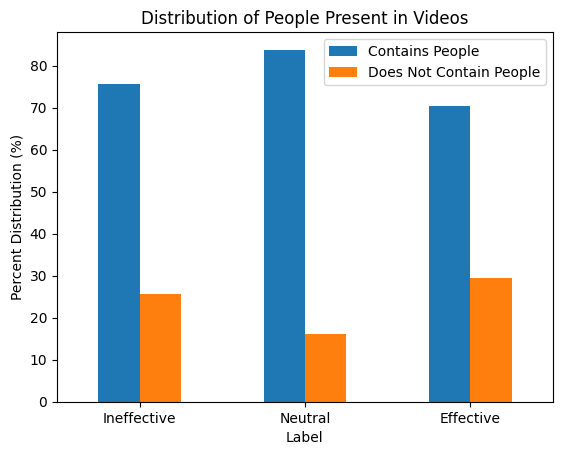

In [10]:
## Contains People
plotdata = pd.DataFrame({
    "Contains People"          : feature_distribution("People", "yes"),
    "Does Not Contain People"  : feature_distribution("People", "no")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata.plot(kind="bar")  

plot("Distribution of People Present in Videos", False)

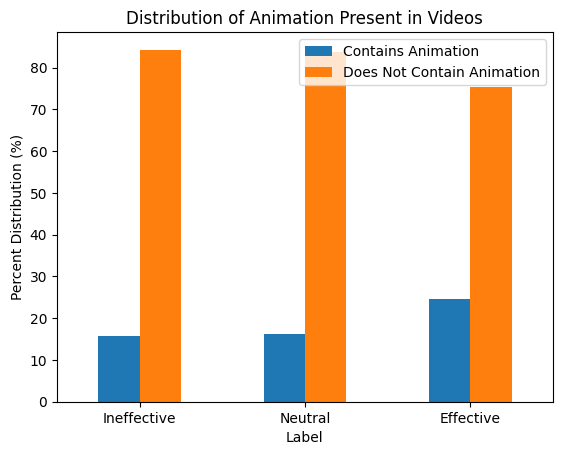

In [11]:
# Contains Animation
plotdata = pd.DataFrame({
    "Contains Animation"          : feature_distribution("Animation", "yes"),
    "Does Not Contain Animation"  : feature_distribution("Animation", "no")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata.plot(kind="bar") 

plot("Distribution of Animation Present in Videos", False)

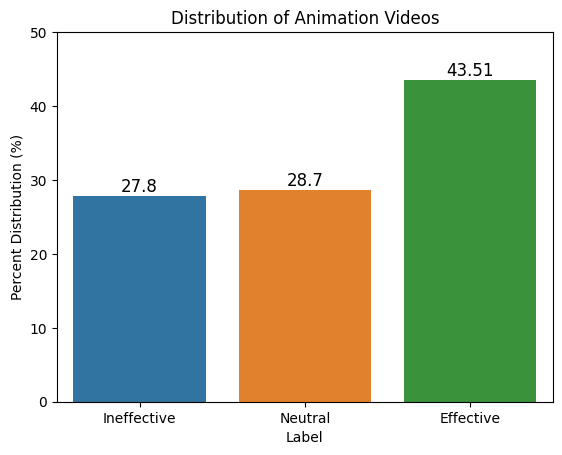

In [12]:
# Contains Animation
import seaborn as sns
distribution = relative_distribution("Animation", "yes")
labels = ["Ineffective", "Neutral", "Effective"]

plotdata = pd.DataFrame({
    "Contains Suggestion"  : distribution
    }, 
    index = labels
)
ax = sns.barplot(x=labels, y=distribution, data=plotdata)
plt.bar_label(ax.containers[0], size=12, label_type='edge')
plt.ylim(0,50)
plot("Distribution of Animation Videos", True, False)

(0.0, 65.0)

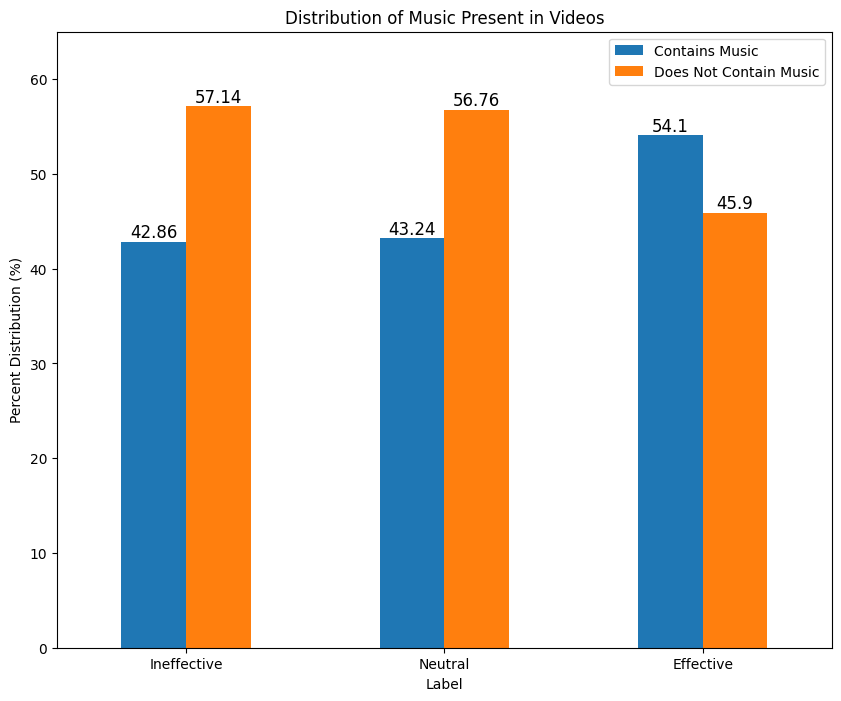

In [13]:
# Contains Music
plotdata = pd.DataFrame({
    "Contains Music"          : feature_distribution("Music", "yes"),
    "Does Not Contain Music"  : feature_distribution("Music", "no")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", figsize=(10,8)) 

plot("Distribution of Music Present in Videos", False, False)
plt.bar_label(ax.containers[0], size=12, label_type='edge')
plt.bar_label(ax.containers[1], size=12, label_type='edge')
plt.ylim(0,65)

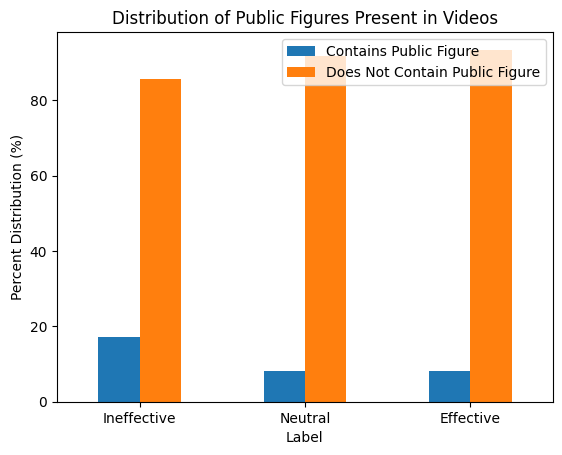

In [14]:
# Contains public figure
plotdata = pd.DataFrame({
    "Contains Public Figure"          : feature_distribution("Mainstream Celebrity", "yes"),
    "Does Not Contain Public Figure"  : feature_distribution("Mainstream Celebrity", "no")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata.plot(kind="bar")  

plot("Distribution of Public Figures Present in Videos", False)

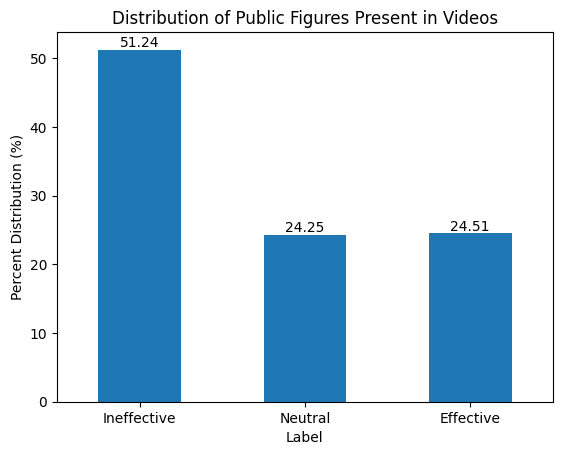

In [15]:
# Contains public figure
plotdata = pd.DataFrame({
    "Contains Mainstream Celebrity"  : relative_distribution("Mainstream Celebrity", "yes")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False)  
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Public Figures Present in Videos", False, False)

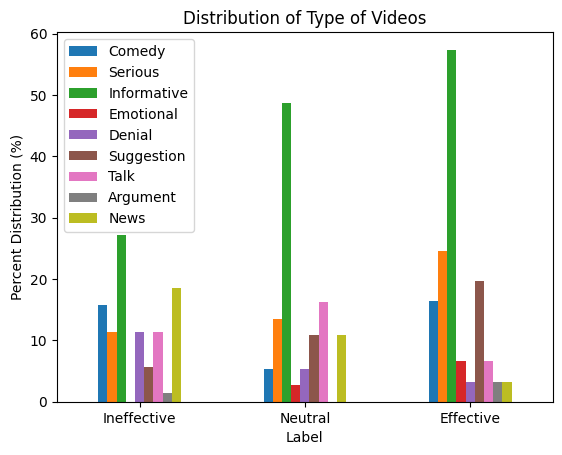

In [16]:
# Type of video
plotdata = pd.DataFrame({
    "Comedy"       : feature_distribution("Type", "comedy"),
    "Serious"      : feature_distribution("Type", "serious"),
    "Informative"  : [a + b for a, b in zip(feature_distribution("Type", "informative"), feature_distribution("Type", "documentary"))],
    "Emotional"    : feature_distribution("Type", "emotional"),
    "Denial"       : feature_distribution("Type", "denial"),
    #"Question"     : feature_distribution("Type", "question"),  
    "Suggestion"   : feature_distribution("Type", "suggestion"), 
    "Talk"         : feature_distribution("Type", "talk"), 
    "Argument"     : feature_distribution("Type", "argument"),
    "News"         : feature_distribution("Type", "news")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata.plot(kind="bar")  

plot("Distribution of Type of Videos", False)

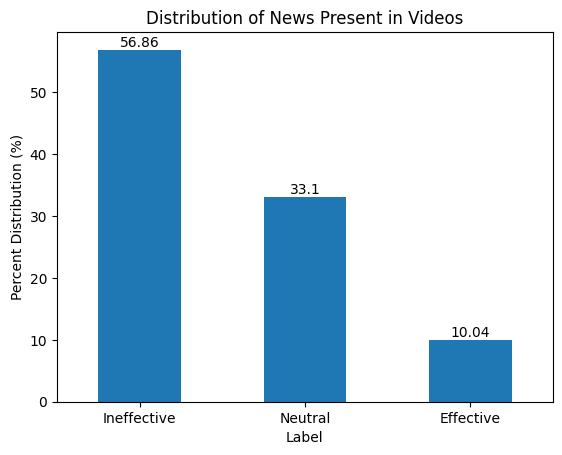

In [17]:
# Contains News
plotdata = pd.DataFrame({
    "Contains News"  : relative_distribution("People", "news")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of News Present in Videos", False, False)

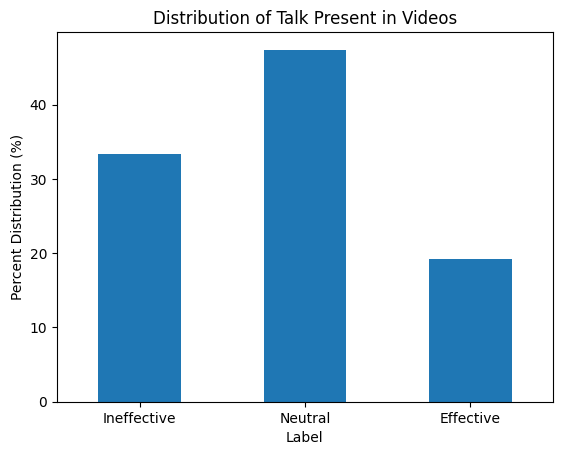

In [18]:
# Contains Talk
plotdata = pd.DataFrame({
    "Contains News"  : relative_distribution("Type", "talk")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata.plot(kind="bar", legend=False) 

plot("Distribution of Talk Present in Videos", False, False)

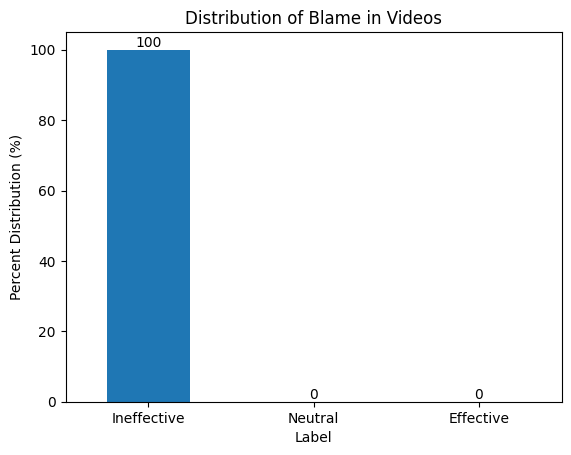

In [19]:
# Contains Blame
plotdata = pd.DataFrame({
    "Contains Blame"  : relative_distribution("Type", "blame")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Blame in Videos", False, False)

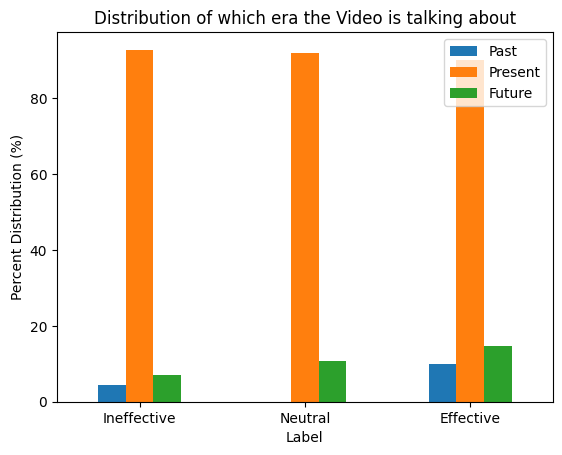

In [20]:
# Past/Present/Future
plotdata = pd.DataFrame({
    "Past"     : feature_distribution("Past/Present/Future", "past"),
    "Present"  : feature_distribution("Past/Present/Future", "present"),
    "Future"   : feature_distribution("Past/Present/Future", "future")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata.plot(kind="bar")  

plot("Distribution of which era the Video is talking about", False)

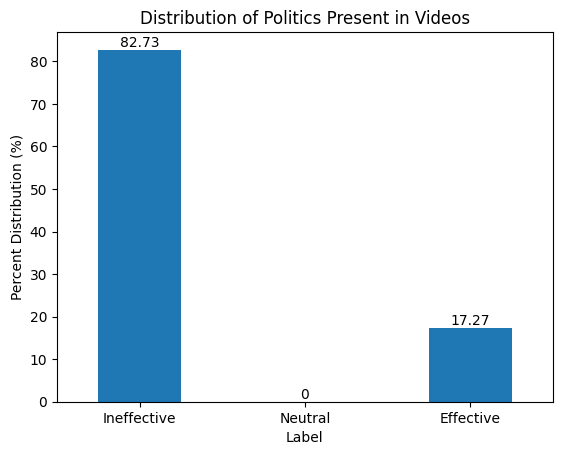

In [21]:
# Contains Politics
plotdata = pd.DataFrame({
    "Contains Politics"  : relative_distribution("People", "politician")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Politics Present in Videos", False, False)

Text(0.5, 0, '')

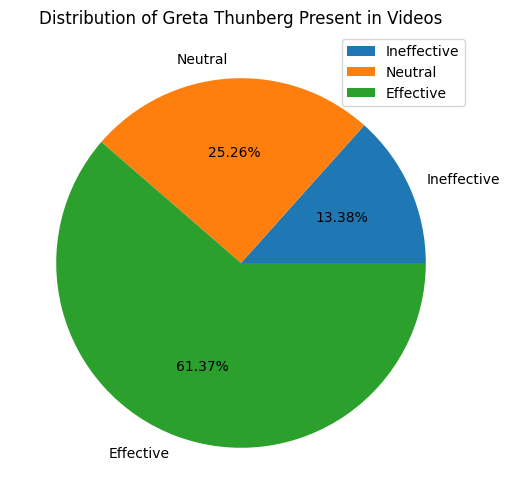

In [22]:
# Contains Greta Thunberg
plotdata = pd.DataFrame({
    "Contains Greta Thunberg"  : relative_distribution("People", "greta")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="pie", figsize=(6,6), y='Contains Greta Thunberg', legend=True, autopct=lambda p:'{:.2f}%'.format(p*sum(relative_distribution("People", "greta"))/100)) 

plot("Distribution of Greta Thunberg Present in Videos", False, False)
ax.set_ylabel('')
ax.set_xlabel('')

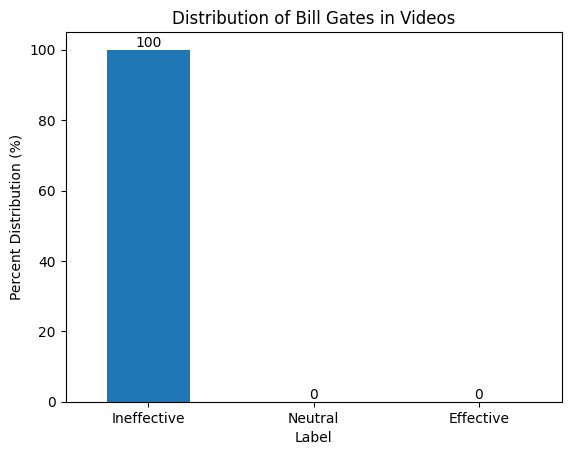

In [23]:
# Contains Bill Gates
plotdata = pd.DataFrame({
    "Contains Bill Gates"  : relative_distribution("People", "gates")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Bill Gates in Videos", False, False)

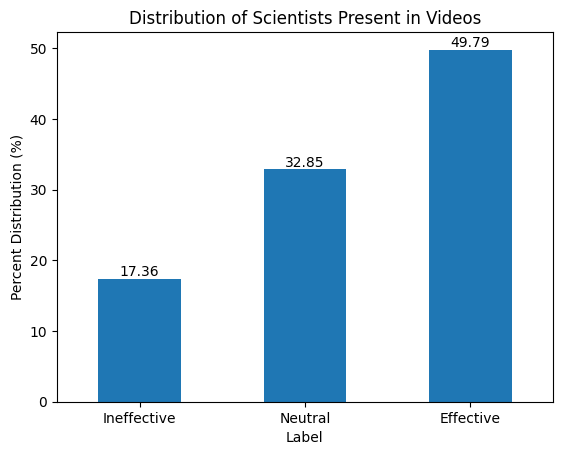

In [24]:
# Contains Scientists
plotdata = pd.DataFrame({
    "Contains Scientists"  : relative_distribution("People", "scientist")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Scientists Present in Videos", False, False)

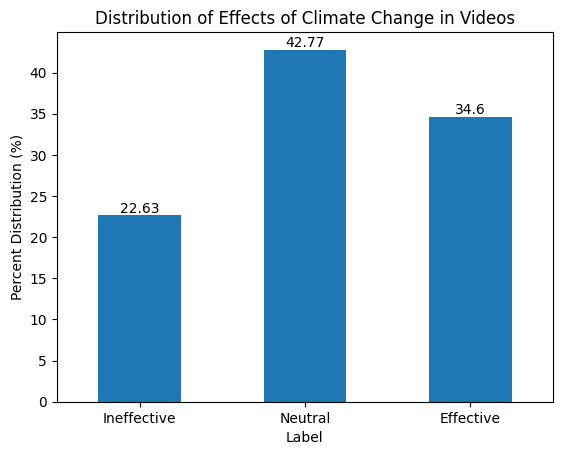

In [25]:
# Contains Effects
plotdata = pd.DataFrame({
    "Contains Effects"  : relative_distribution("Type", "effects")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Effects of Climate Change in Videos", False, False)

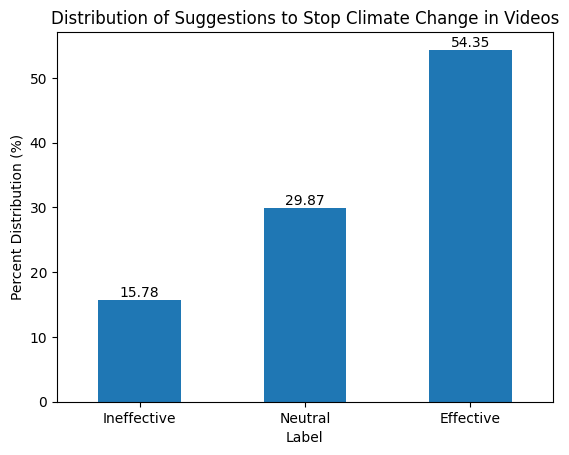

In [26]:
# Contains Suggestion
plotdata = pd.DataFrame({
    "Contains Suggestion"  : relative_distribution("Type", "suggestion")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Suggestions to Stop Climate Change in Videos", False, False)

Text(0.5, 0, '')

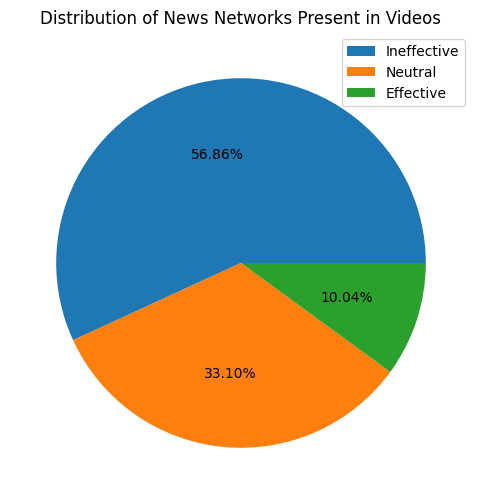

In [27]:
# Contains News
plotdata = pd.DataFrame({
    "Contains News"  : relative_distribution("Type", "news")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="pie", figsize=(6,6), y='Contains News', legend=True, labels=None, autopct=lambda p:'{:.2f}%'.format(p*sum(relative_distribution("Type", "news"))/100)) 

plot("Distribution of News Networks Present in Videos", False, False)
ax.set_ylabel('')
ax.set_xlabel('')

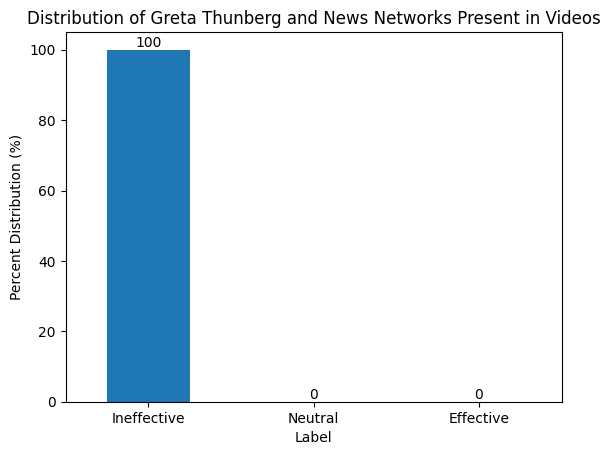

In [28]:
# Contains Greta and News
plotdata = pd.DataFrame({
    "Contains News in the News"  : relative_distribution("People", r'(?=.*news)(?=.*greta)') 
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 
ax.bar_label(ax.containers[0], label_type='edge')

plot("Distribution of Greta Thunberg and News Networks Present in Videos", False, False)

In [29]:
test = data.loc[data['People'].str.contains(r'(?=.*news)(?=.*greta)',regex=True)]
test

,VideoID,Effectiveness2,No of Views,No of Comments,No of Likes,No of Dislikes,People,Mainstream Celebrity,Music,Animation,Past/Present/Future,Type,likes/dislikes ratio
107,bq4rblcpeem,ineffective,651000,2949,8600,4000,yes (news/greta),no,yes (instrumental),no,present,news/interview,2.15


# Meta data

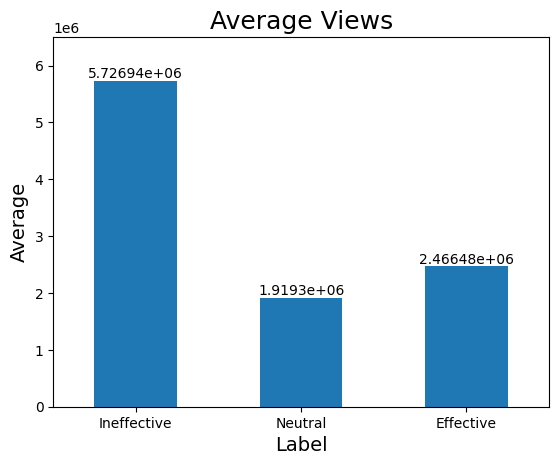

In [30]:
# average views
plotdata = pd.DataFrame({
    "average views"  : [neg["No of Views"].sum()/len(neg), neu["No of Views"].sum()/len(neu), pos["No of Views"].sum()/len(pos)]
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 

plt.title("Average Views", size=18)
plt.xlabel("Label", size=14)
plt.ylabel("Average", size=14)  
plt.xticks(rotation=0, ha="center")
plt.ylim([0,6500000])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

#plt.savefig('Average views.png', bbox_inches = "tight")

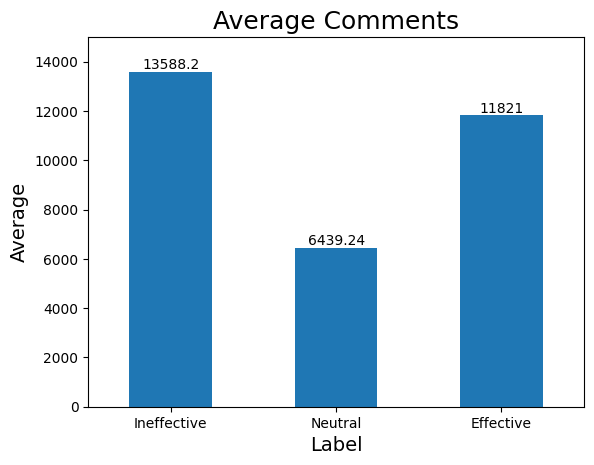

In [31]:
# average comments
plotdata = pd.DataFrame({
    "average comments"  : [neg["No of Comments"].sum()/len(neg), neu["No of Comments"].sum()/len(neu), pos["No of Comments"].sum()/len(pos)]
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 

plt.title("Average Comments", size=18)
plt.xlabel("Label", size=14)
plt.ylabel("Average", size=14)  
plt.xticks(rotation=0, ha="center")
plt.ylim([0,15000])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

#plt.savefig('Average Comments.png', bbox_inches = "tight")

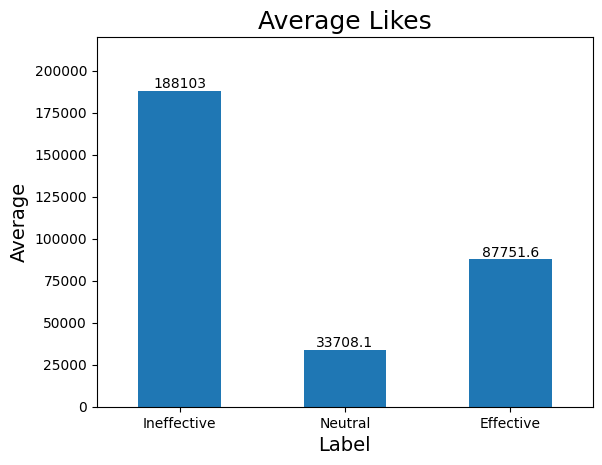

In [32]:
# average likes
plotdata = pd.DataFrame({
    "average likes"  : [neg["No of Likes"].sum()/len(neg), neu["No of Likes"].sum()/len(neu), pos["No of Likes"].sum()/len(pos)]
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 

plt.title("Average Likes", size=18)
plt.xlabel("Label", size=14)
plt.ylabel("Average", size=14)  
plt.xticks(rotation=0, ha="center")
plt.ylim([0,220000])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

#plt.savefig('Average likes.png', bbox_inches = "tight")

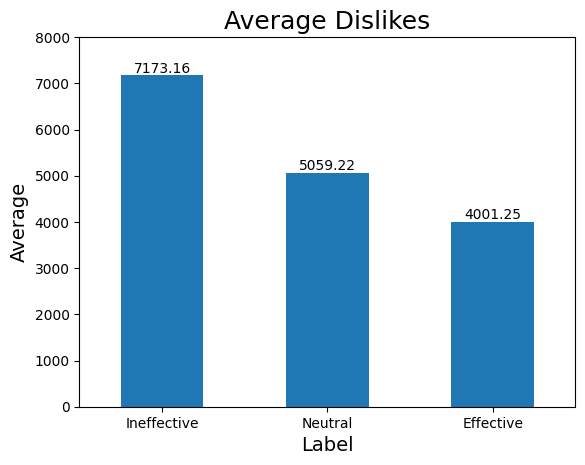

In [33]:
# average dislikes
plotdata = pd.DataFrame({
    "average likes"  : [neg["No of Dislikes"].sum()/len(neg), neu["No of Dislikes"].sum()/len(neu), pos["No of Dislikes"].sum()/len(pos)]
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", legend=False) 

plt.title("Average Dislikes", size=18)
plt.xlabel("Label", size=14)
plt.ylabel("Average", size=14)  
plt.xticks(rotation=0, ha="center")
plt.ylim([0,8000])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

#plt.savefig('Average dislikes.png', bbox_inches = "tight")

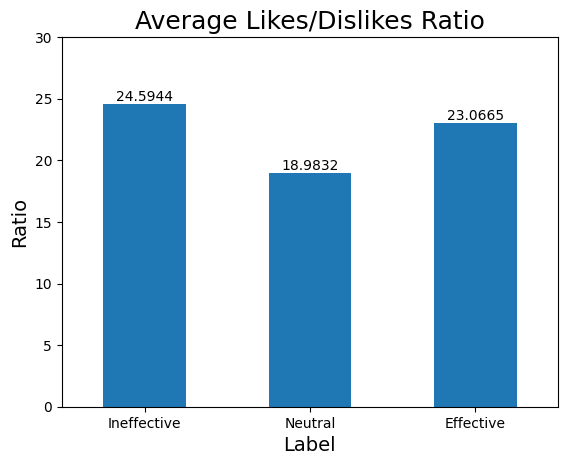

In [34]:
# average likes/dislkikes ratio
plotdata = pd.DataFrame({
    "likes/dislikes ratio"  : [neg["likes/dislikes ratio"].sum()/len(neg), neu["likes/dislikes ratio"].sum()/len(neu), pos["likes/dislikes ratio"].sum()/len(pos)]
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar",legend=False)   

plt.title("Average Likes/Dislikes Ratio", size=18)
plt.xlabel("Label", size=14)
plt.ylabel("Ratio", size=14)  
plt.xticks(rotation=0, ha="center")
plt.ylim([0,30])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]  

#plt.savefig('Average likes,dislikes ratio.png', bbox_inches = "tight")

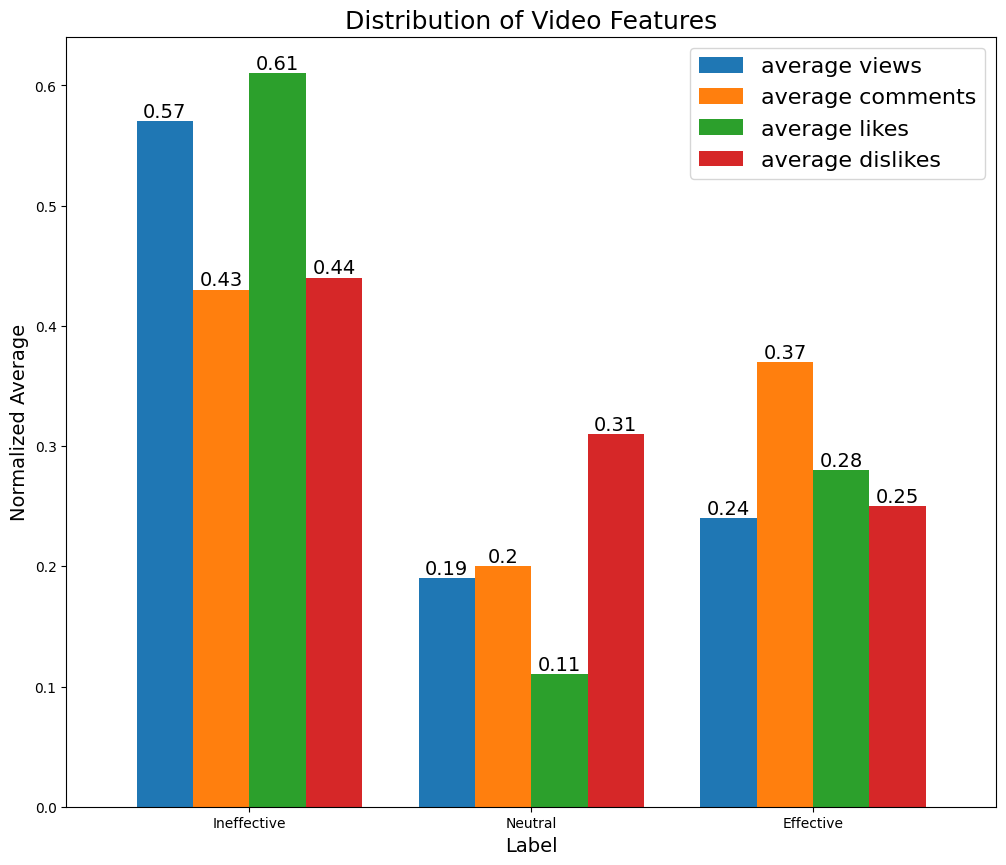

In [35]:
# combination
average_views_sum = neg["No of Views"].sum()/len(neg) + neu["No of Views"].sum()/len(neu) + pos["No of Views"].sum()/len(pos)
average_comments_sum = neg["No of Comments"].sum()/len(neg) + neu["No of Comments"].sum()/len(neu) + pos["No of Comments"].sum()/len(pos)
average_likes_sum = neg["No of Likes"].sum()/len(neg) + neu["No of Likes"].sum()/len(neu) + pos["No of Likes"].sum()/len(pos)
average_dislikes_sum = neg["No of Dislikes"].sum()/len(neg) + neu["No of Dislikes"].sum()/len(neu) + pos["No of Dislikes"].sum()/len(pos)

plotdata = pd.DataFrame({
    "average views"     : [neg["No of Views"].sum()/len(neg), neu["No of Views"].sum()/len(neu), pos["No of Views"].sum()/len(pos)]/average_views_sum,
    "average comments"  : [neg["No of Comments"].sum()/len(neg), neu["No of Comments"].sum()/len(neu), pos["No of Comments"].sum()/len(pos)]/average_comments_sum,
    "average likes"     : [neg["No of Likes"].sum()/len(neg), neu["No of Likes"].sum()/len(neu), pos["No of Likes"].sum()/len(pos)]/average_likes_sum,
    "average dislikes"  : [neg["No of Dislikes"].sum()/len(neg), neu["No of Dislikes"].sum()/len(neu), pos["No of Dislikes"].sum()/len(pos)]/average_dislikes_sum
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
plotdata = plotdata.round(2)
ax = plotdata.plot(kind="bar", figsize=(12,10), width=0.8) 

plt.title("Distribution of Video Features", size=18)
plt.xlabel("Label", size=14)
plt.ylabel("Normalized Average", size=14)  
plt.xticks(rotation=0, ha="center")
plt.legend(prop={'size': 16})
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge', size=14)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

#plt.savefig('Combined views,comments,likes,dislikes.png', bbox_inches = "tight")

# Combination

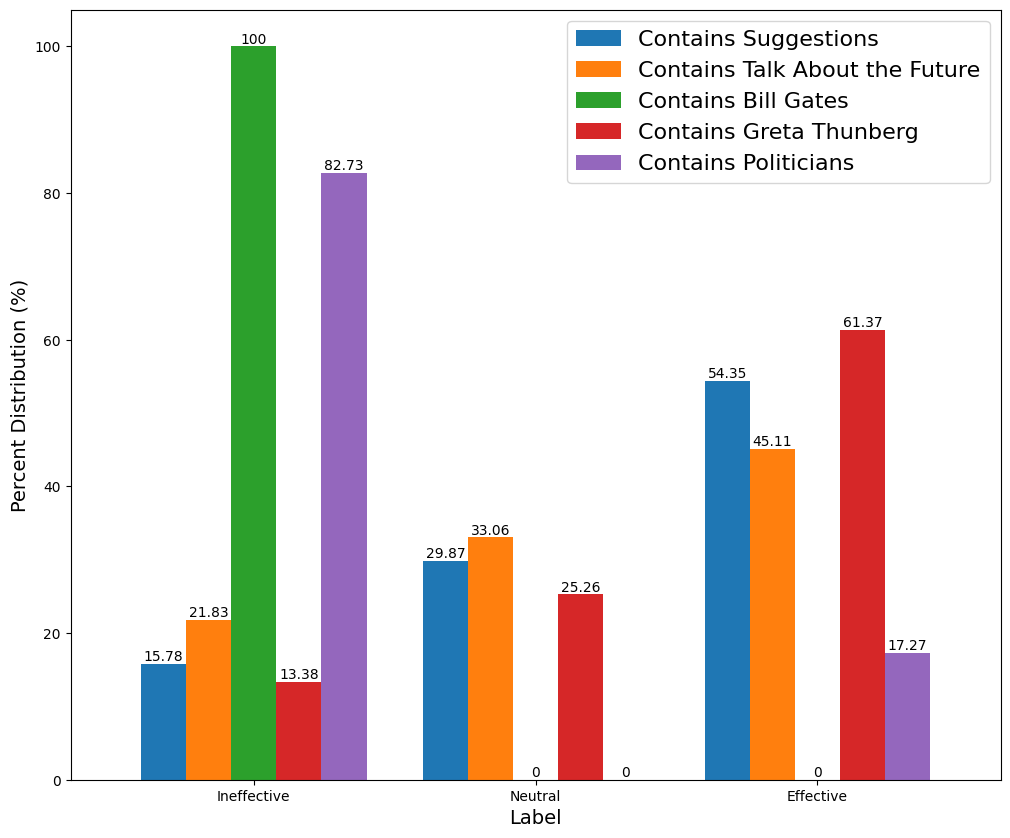

In [36]:
# Combination of features
plotdata = pd.DataFrame({
    "Contains Suggestions"            : relative_distribution("Type", "suggestion"),
    "Contains Talk About the Future"  : relative_distribution("Past/Present/Future", "future"),
    "Contains Bill Gates"             : relative_distribution("People", "gates"),
    "Contains Greta Thunberg"         : relative_distribution("People", "greta"),
    "Contains Politicians"            : relative_distribution("People", "politician")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", figsize=(12,10), width=0.8)   

plt.legend(prop={'size': 16})
plt.xlabel("Label", size=14)
plt.ylabel("Percent Distribution (%)", size=14)
plt.xticks(rotation=0, ha="center")
plt.ylim([0,105])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]    

#plt.savefig('Distribution of Features in Climate Change Videos.png', bbox_inches = "tight")

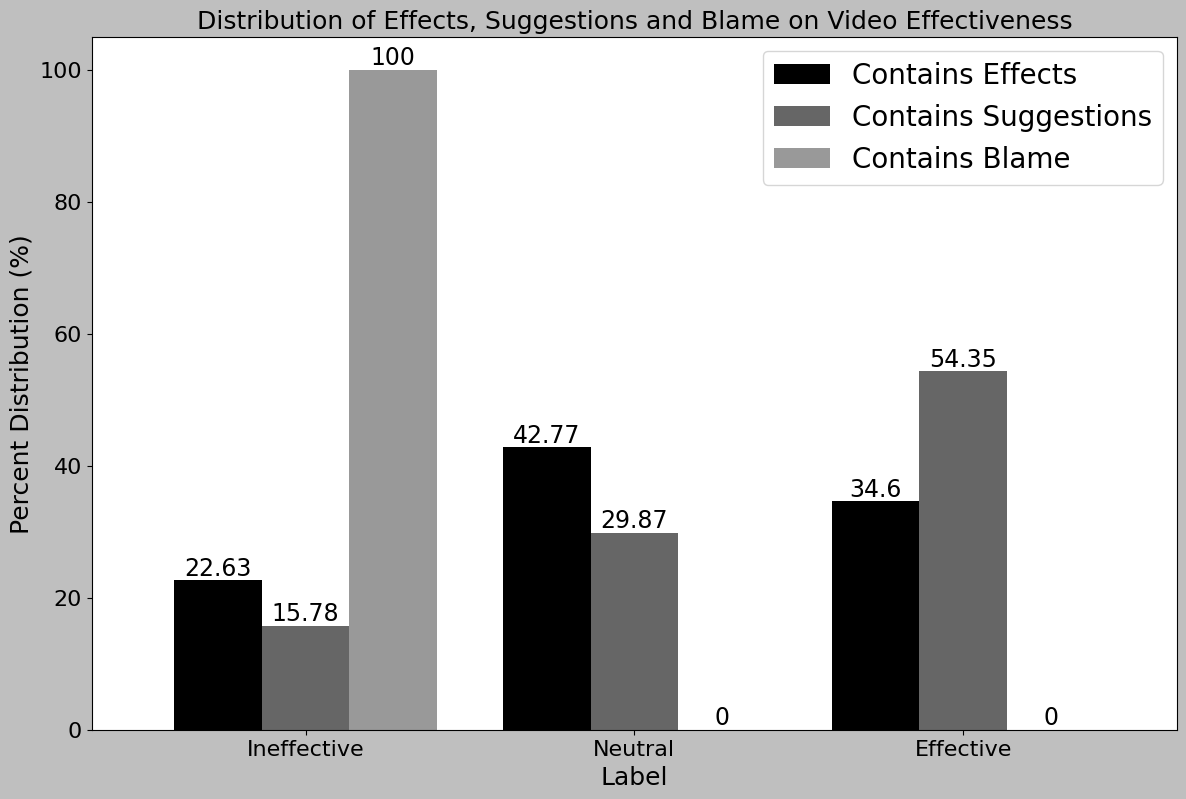

In [52]:
# Combination of Effects/Suggestions/Blame
plt.style.use('grayscale')

plotdata = pd.DataFrame({
    "Contains Effects"       :  relative_distribution("Type", "effects"),
    "Contains Suggestions"   :  relative_distribution("Type", "suggestion"),
    "Contains Blame"         :  relative_distribution("Type", "blame")
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", figsize=(14,9), width=0.8)   

plt.title("Distribution of Effects, Suggestions and Blame on Video Effectiveness", size=18)
plt.legend(prop={'size': 20})
plt.xlabel("Label", size=18)
plt.ylabel("Percent Distribution (%)", size=18)
plt.xticks(rotation=0, ha="center", size=16)
plt.yticks(size=16)
plt.ylim([0,105])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge', size=17)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]  


plt.savefig('Distribution of Effects, Suggestions, Blame in Climate Change Videos.png', bbox_inches="tight", dpi=600)

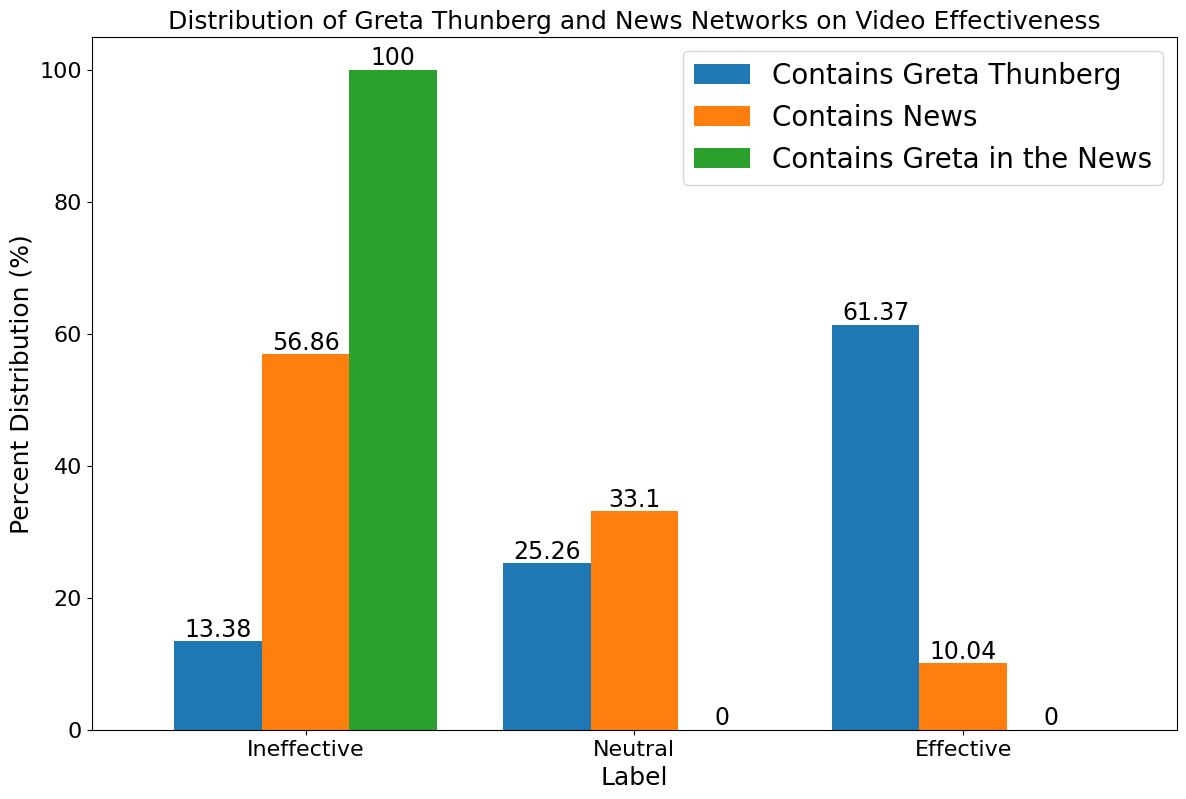

In [38]:
# Combination of Greta/News/Greta and News
plotdata = pd.DataFrame({
    "Contains Greta Thunberg"        : relative_distribution("People", "greta"),
    "Contains News"                  : relative_distribution("People", "news"),
    "Contains Greta in the News"     : relative_distribution("People", r'(?=.*news)(?=.*greta)') 
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", figsize=(14,9), width=0.8)   

plt.title("Distribution of Greta Thunberg and News Networks on Video Effectiveness", size=18)
plt.legend(prop={'size': 20})
plt.xlabel("Label", size=18)
plt.ylabel("Percent Distribution (%)", size=18)
plt.xticks(rotation=0, ha="center", size=16)
plt.yticks(size=16)
plt.ylim([0,105])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge', size=17)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]    

#plt.savefig('Distribution of Greta,News,Greta and News in Climate Change Videos.png', bbox_inches = "tight")

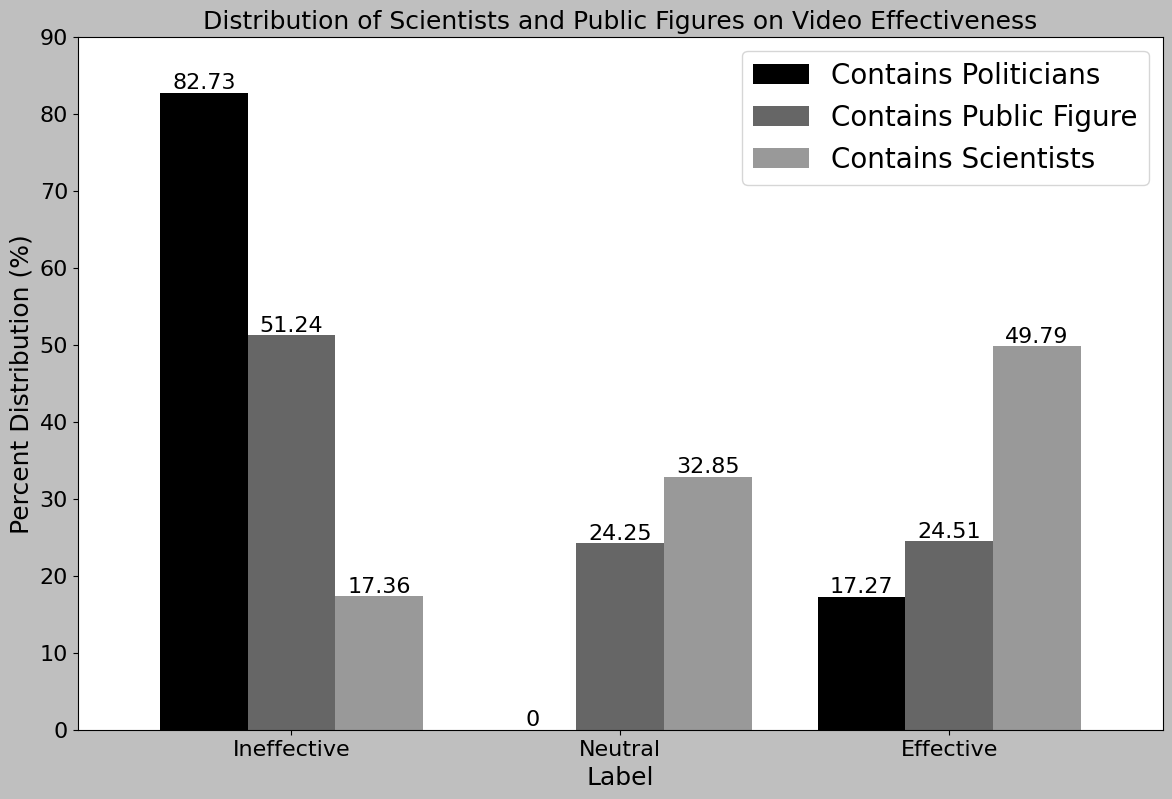

In [51]:
# Combination of Scientists, Public Figures
plotdata = pd.DataFrame({
    "Contains Politicians"        : relative_distribution("People", "politician"),
    "Contains Public Figure"      : relative_distribution("Mainstream Celebrity", "yes"),
    "Contains Scientists"         : relative_distribution("People", "scientist"),
    }, 
    index = ["Ineffective", "Neutral", "Effective"]
)
ax = plotdata.plot(kind="bar", figsize=(14,9), width=0.8)   

plt.title("Distribution of Scientists and Public Figures on Video Effectiveness", size=18)
plt.legend(prop={'size': 20})
plt.xlabel("Label", size=18)
plt.ylabel("Percent Distribution (%)", size=18)
plt.xticks(rotation=0, ha="center", size=16)
plt.yticks(size=16)
plt.ylim([0,90])
for i in range(len(plotdata.columns)):
    ax.bar_label(ax.containers[i], label_type='edge', size=16)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]    

plt.savefig('Distribution of Politicians, Scientists, Public Figures in Climate Change Videos.png', bbox_inches="tight", dpi=600)